In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


# Example 1 - Linear regression


In [3]:
class LinearRegressionNet(nn.Module):
    def __init__(self, in_dim=1, out_dim=1):
        super().__init__() 
        self.output = nn.Linear(in_dim, out_dim)

    def forward(self, x):
        return self.output(x)


In [5]:
# setup model, loss func and optimizer
model = LinearRegressionNet()
loss_func = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)


torch.Size([6]) torch.Size([6])
torch.Size([6, 1]) torch.Size([6, 1])


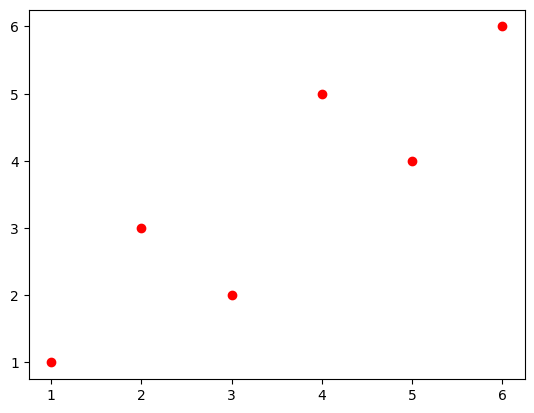

In [10]:
# Define the training data, import as np array and convert to tensors.
x_samples = np.array([1,2,3,4,5,6])
y_samples = np.array([1,3,2,5,4,6])
plt.plot(x_samples, y_samples, 'ro')

# convert to tensors - pytorch performs the linear operator 
x = torch.from_numpy(x_samples).float()
y = torch.from_numpy(y_samples).float()
print(x.shape, y.shape)

# 
x = x.view(x.shape[0], 1) # Set new dimention for the tensors
y = y.view(y.shape[0], 1)
print(x.shape, y.shape)


In [11]:
# Define number of epochs. 1 epoch is 1 training cycle. during 1 epoch the model will see the data once.
nEpochs = 1000

for i in range(nEpochs):
    # forward pass
    y_predicted = model.forward(x)
    loss = loss_func(y, y_predicted)
    print(f'loss: {loss}, epoch: {i}')

    # backward pass
    loss.backward()

    # update the weights and biases
    optimizer.step()

    # zero out the grads before next cycle
    optimizer.zero_grad()

loss: 10.39932632446289, epoch: 0
loss: 5.153401851654053, epoch: 1
loss: 2.7254130840301514, epoch: 2
loss: 1.6016472578048706, epoch: 3
loss: 1.0815157890319824, epoch: 4
loss: 0.8407648205757141, epoch: 5
loss: 0.7293193340301514, epoch: 6
loss: 0.6777205467224121, epoch: 7
loss: 0.653820812702179, epoch: 8
loss: 0.6427411437034607, epoch: 9
loss: 0.6375948786735535, epoch: 10
loss: 0.6351949572563171, epoch: 11
loss: 0.6340665817260742, epoch: 12
loss: 0.633526623249054, epoch: 13
loss: 0.6332588791847229, epoch: 14
loss: 0.6331178545951843, epoch: 15
loss: 0.6330351233482361, epoch: 16
loss: 0.6329795718193054, epoch: 17
loss: 0.6329367756843567, epoch: 18
loss: 0.6329002976417542, epoch: 19
loss: 0.632866382598877, epoch: 20
loss: 0.6328340172767639, epoch: 21
loss: 0.6328024864196777, epoch: 22
loss: 0.6327715516090393, epoch: 23
loss: 0.6327407956123352, epoch: 24
loss: 0.6327102780342102, epoch: 25
loss: 0.6326802968978882, epoch: 26
loss: 0.6326503157615662, epoch: 27
loss: 0

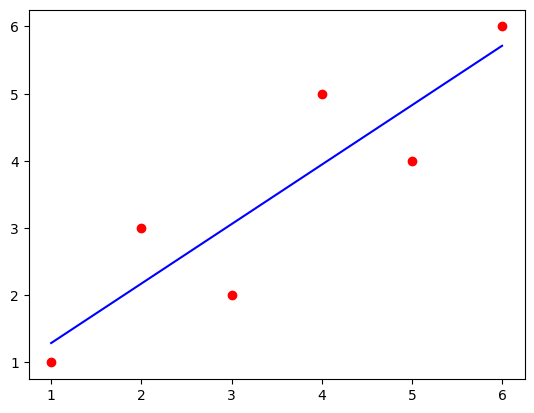

In [13]:
# Test the model
y_predicted = model.forward(x).detach().numpy() # convert from tensor to numpy

plt.plot(x_samples, y_predicted, 'b')
plt.plot(x_samples, y_samples, 'ro')
plt.show()

In [14]:
# show the neural network weights and biases
for name, param in model.named_parameters():
    print(f'name: {name}, param_data: {param.data}')

name: output.weight, param_data: tensor([[0.8847]])
name: output.bias, param_data: tensor([0.4042])
